Barplots on the distirbution of students in each labels

In [1]:
import os
import json
import pickle
import yaml

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Palette
with open('../visualisers/maps/concat_labels.yaml', 'r') as fp:
    palette = yaml.load(fp, Loader=yaml.FullLoader)
    palette = palette['vector_labels']
    palette['q1'] = '#8AB0AB'
    palette['q2'] = '#3E505B'
    palette['q3'] = '#F2F230'
    palette['q4'] = '#1A1D1A'

In [3]:
# Rankings
with open('../../data/post_test/rankings.pkl', 'rb') as fp:
    rankings = pickle.load(fp)

In [4]:
# Labelling maps
directory = '../../data/experiment_keys/permutation_maps/'
files = os.listdir(directory)
files = [file for file in files if 'example' not in file]
maps = []
for file in files:
    with open(directory + file, 'r') as fp:
        label_map = yaml.load(fp, Loader=yaml.FullLoader)
        maps.append(label_map)

In [7]:
palette

{'000': 'orangered',
 '100': 'mediumvioletred',
 '010': 'mediumorchid',
 '001': 'mediumpurple',
 '110': 'royalblue',
 '101': 'dodgerblue',
 '011': 'steelblue',
 '111': 'yellowgreen',
 'q1': '#8AB0AB',
 'q2': '#3E505B',
 'q3': '#F2F230',
 'q4': '#1A1D1A'}

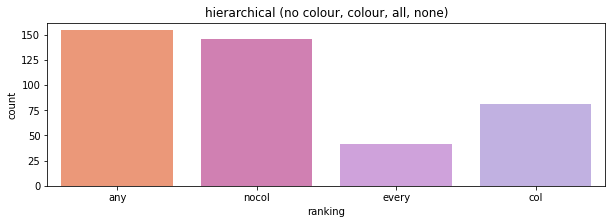

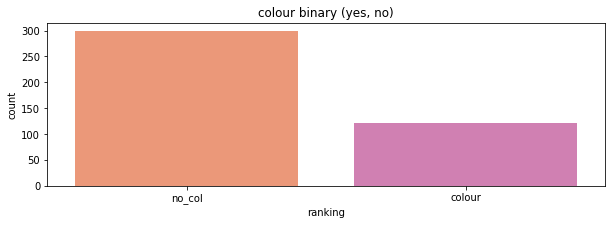

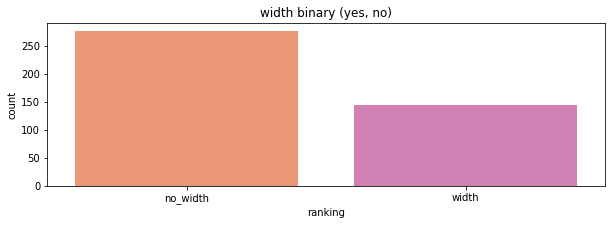

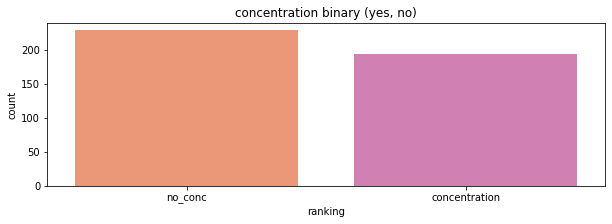

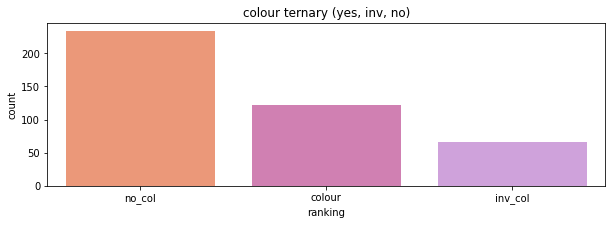

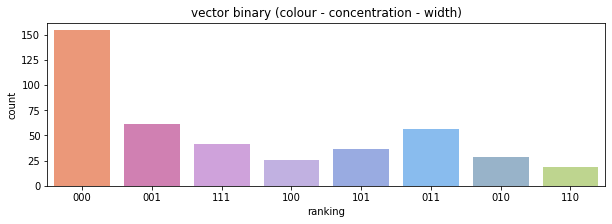

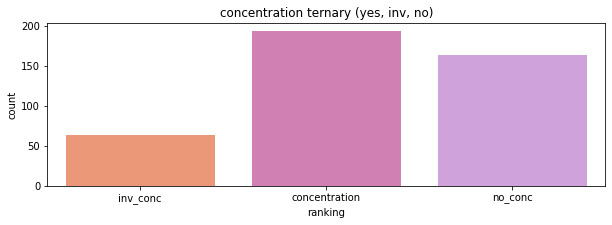

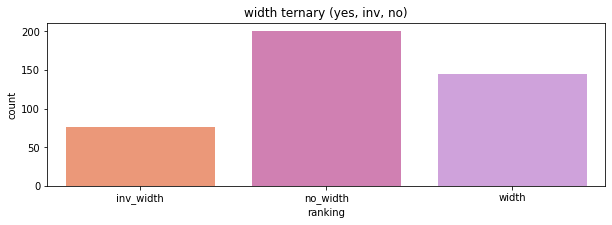

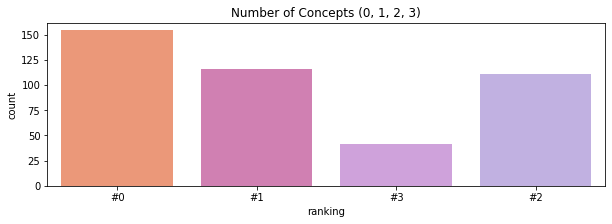

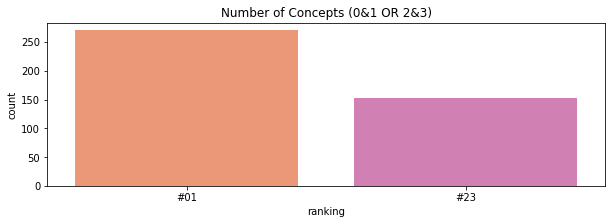

In [13]:
for label_map in maps:
    name = label_map['name']
    labels = rankings['ranking'].apply(lambda x: label_map['map'][x])
    colour_keys = list(palette.keys())
    colours = [palette[colour_keys[i]] for i in list(range(len(np.unique(labels))))]
    
    plt.figure(figsize=(10, 3))
    sns.countplot(x=labels, palette=colours, alpha=0.6)
    plt.title(name)

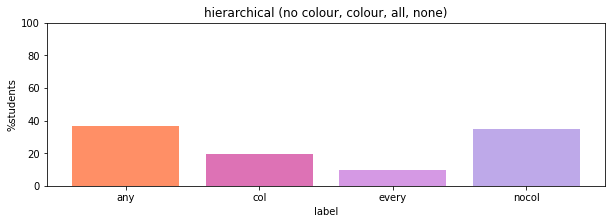

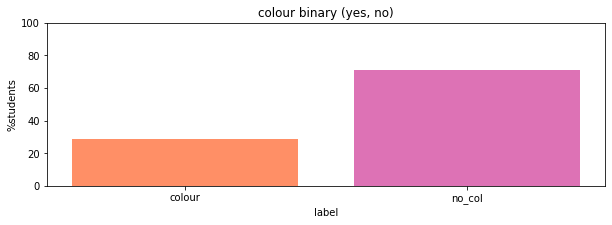

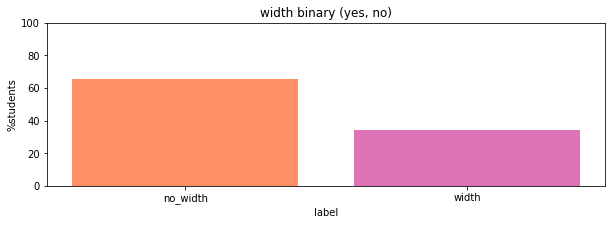

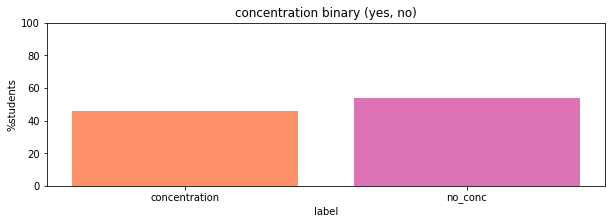

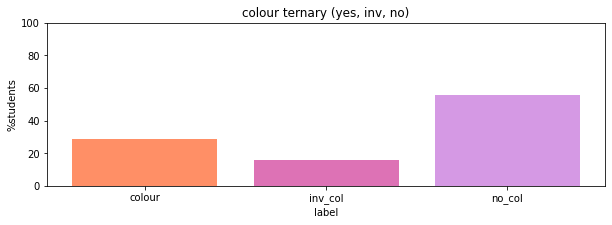

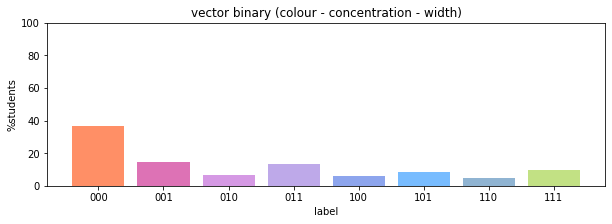

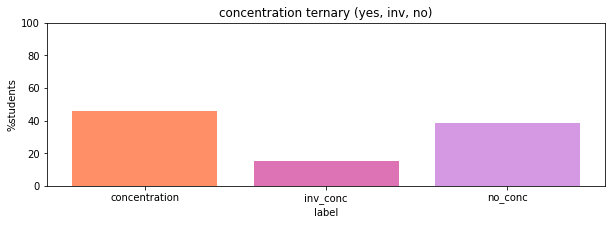

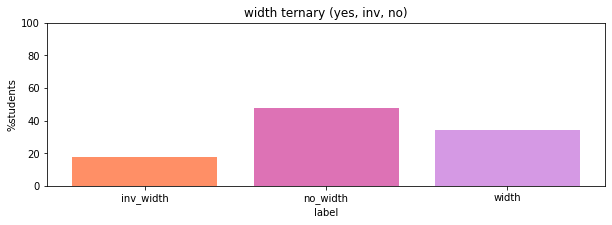

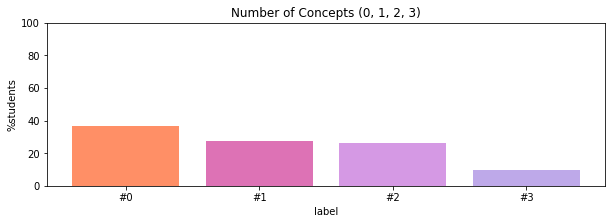

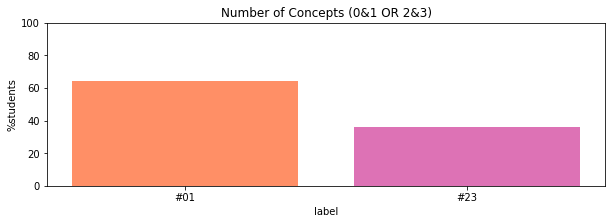

In [18]:
for label_map in maps:
    name = label_map['name']
    labels = rankings['ranking'].apply(lambda x: label_map['map'][x])
    colour_keys = list(palette.keys())
    colours = [palette[colour_keys[i]] for i in list(range(len(np.unique(labels))))]
    
    xs = []
    ys = []
    for label in np.unique(labels):
        xs.append(label)
        y = len([lab for lab in labels if lab == label])
        ys.append(y*100/len(labels))
    
    plt.figure(figsize=(10, 3))
    plt.bar(x=xs, height=ys, color=colours, alpha=0.6)
    plt.title(name)
    
    plt.xlabel('label')
    plt.ylabel('%students')
    plt.ylim([0, 100])